# 3.  Visualisation

<center><img src='img/misleading-plots-1.jpg'></center>

Notes: 
Drawing attractive figures is important. Visualisations are central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention. Besides the attractiveness, correctness is obviously even more important. Misleading data visualisations can lead to misinterpretations and false conclusions, e.g. [example 1](https://www.datapine.com/blog/misleading-data-visualization-examples/), [example 2](https://learningsolutionsmag.com/articles/misleading-data-visualizations-can-confuse-deceive-learners).  


<center><img src='img/flowchart-visualisation-python.png'></center>


Notes: When you're new to Python, the amount of visualisation libraries can be overwhelming. As a general rule of thumb, it's often a better choice to reflect on which type of graph you want to plot and choose the corresponding and appropriate library. For this course we've chosen to dive into the Seaborn library.

Generally you could summarize that **Matplotlib (pyplot)**  has great flexibility and versatility that comes with the cost of (sometimes) complexity and low-level type of programming. **Seaborn** is a Python data visualisation library which is built on-top of Matplotlib and closely integrated with pandas data structures. It provides a higher-level wrapper on the library which makes it easier to create more aesthetically pleasing plots.  

At the end of this chapter you'll find a bunch of references to blogs with comparisons of different libraries. 

## 3.2 Seaborn

![Seaborn logo](img/seaborn-logo.png)

### 3.2.1 Introduction
- Overview of Seaborn plots on the [documentation website](https://seaborn.pydata.org/examples/index.html) 
- Large `seaborn` stock of plots, further customization with `matplotlib.pyplot`
- Plots:
  - Lineplot
  - Barplot
  - Multiplots
  - Volcano plots
  - Heatmaps
- Lay-outing options

Notes: 
An overview of Seaborn plots is accessible on the documentation website. Many plots can be accomplished with only seaborn functions, however for non-conventional plots, further customization is possible using Matplotlib pyplot directly.
Throughout this chapter we'll be using seaborn, pandas and some of matplotlib's features to further modify our plots.

### 3.2.1 Introduction

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Some notebooks require the explicit setting of matplotlib inline to plot the graphs into the notebook
%matplotlib inline

### 3.2.2 Lineplot  

In [3]:
# Download data from datahub.io. 
pharma = pd.read_csv('data/pharmaspending.csv')

# Inspect the data
pharma

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,LTU,2012,28.942,1.820,448.728,NaN,1340.70
1032,LTU,2013,28.173,1.728,461.178,NaN,1364.02
1033,LTU,2014,27.836,1.724,485.245,NaN,1422.92
1034,LTU,2015,26.784,1.745,504.422,NaN,1465.30


Notes: We will start exploring the Seaborn library with lineplots. 

The following example elaborates on lineplots with a new dataset. This dataset is retrieved from [Datahub.io](https://datahub.io/core/pharmaceutical-drug-spending) and contains the spendings of a bunch of countries in pharmaceutical as from 1971. The dataset is available in the data folder as `pharmaspending.csv`. 

### 3.2.2 Lineplot  

<AxesSubplot:xlabel='TIME', ylabel='PC_GDP'>

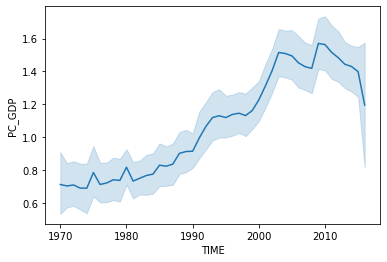

In [4]:
# Download data from datahub.io. 
pharma = pd.read_csv('data/pharmaspending.csv')

# Make a lineplot of the percentage of GDP over time
sns.lineplot(x = 'TIME', y = 'PC_GDP', data = pharma)

Notes: 
The following is defined:
- x-axis: column name that contains the data for the x-axis = `'TIME'`
- y-axis: column name that contains the data for the y-axis = `'PC_GDP'`
- dataset: name of the dataset = `'pharma'`

Note that the name of the x and y argument are not random. They share the identical name of the column names in the dataframe.

This is the lineplot of the percentage of GDP for all the countries in this dataframe. We can make a subselection of this dataframe that contains the data for Belgium and its neigbhouring countries France, Germany and the Netherlands

<AxesSubplot:xlabel='TIME', ylabel='PC_GDP'>

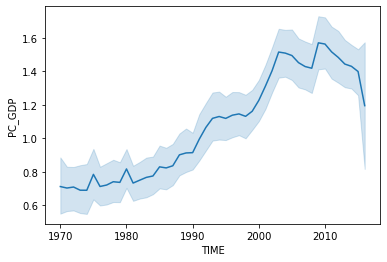

In [5]:
# Make a lineplot of the percentage of GDP over time
sns.lineplot(x = 'TIME', y = 'PC_GDP', data = pharma)

### Question:

Knowing that the dataset contains data for 36 countries from 1971 until 2015. What happened when Seaborn made this plot for us?  

Notes: Many seaborn functions can automatically perform the statistical estimation and plot it on your graph. More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean. This is the lineplot of the percentage of GDP for all the countries in this dataframe. 

How can you know there are 36 countries in this dataset? 
```python
len(pharma['LOCATION'].unique())
```

### 3.2.2 Lineplot  

In [6]:
# Make empty dataframe
sub_pharma = pd.DataFrame()

# Countries of interest
countries = ['BEL', 'FRA', 'DEU', 'NLD']

# Make subselection dataframe with the data of the countries of interest
for country in countries:
    sub_pharma = sub_pharma.append(pharma.loc[pharma['LOCATION'] == country], ignore_index=True)
    
sub_pharma

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,BEL,1970,28.113,1.078,41.918,NaN,404.74
1,BEL,1971,28.275,1.109,46.908,NaN,453.75
2,BEL,1972,27.629,1.126,52.105,NaN,506.00
3,BEL,1973,27.547,1.200,61.916,NaN,603.17
4,BEL,1974,26.779,1.183,69.147,NaN,675.73
...,...,...,...,...,...,...,...
154,NLD,2012,8.277,0.903,421.533,NaN,7062.77
155,NLD,2013,7.757,0.845,411.405,NaN,6913.43
156,NLD,2014,7.638,0.829,406.470,NaN,6855.12
157,NLD,2015,7.865,0.841,416.594,NaN,7057.07


### 3.2.2 Lineplot  

<AxesSubplot:xlabel='TIME', ylabel='PC_GDP'>

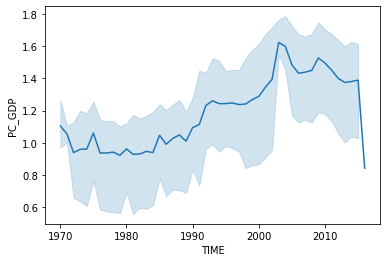

In [7]:
# Make a lineplot of the percentage of GDP over time
sns.lineplot(x = 'TIME', y = 'PC_GDP', data = sub_pharma)

Notes: add `hue='LOCATION'`

**Question**:
Why doesn't Seaborn calculate a statistical estimation around the lines in this plot? What has changed as compared to the first lineplot? 

### 3.2.3 Barplot

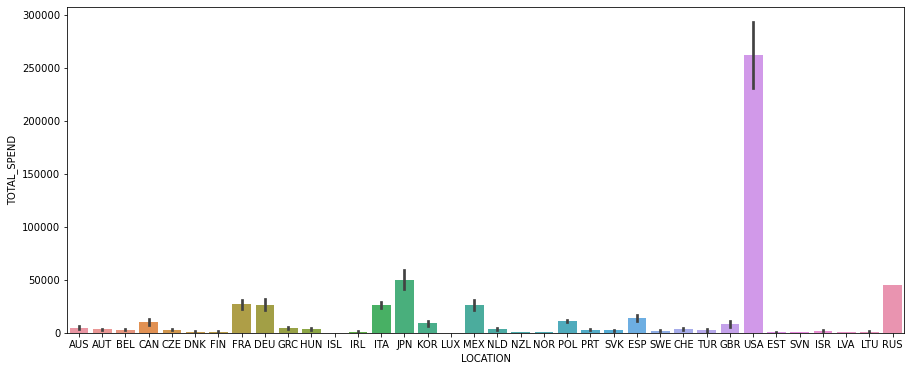

In [8]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Plot barplot with similar x, y and data definitions
ax = sns.barplot(x = 'LOCATION', y = 'TOTAL_SPEND', data = pharma)

Notes: Take the sum of all spendings from oldest until the most recent spendings (TOTAL_SPEND) and make a barplot. Notice that this may lead to misinterpretation and plot the spendings per capita.

CHANGE: y to `'PC_GDP'`!! 

### 3.2.3.1 Exercise:
Plot the same barplot but only for Belgium vs the Netherlands. Find a barplot argument that selects which country is selected and hence plotted (instead of making another subselection of the pandas dataframe). 

**Extra**: Adjust the figure with error bar caps, your favourite color palette, make it a horizontal barplot, or experiment with any of the other features. 

## 3.2.3 Barplots - Use-case

From exercise [2.5.1 - B](02_Pandas.ipynb), `metagenic.csv` contains methylated cytosines in a specific region of a gene, where we added a new column with total counts per chromosome. 

In [11]:
# Import data
metagenic = pd.read_csv('data/metagenic.csv')

# Add a column with total counts
metagenic["total"] = metagenic.sum(axis = 1)

# Order the table per total counts
metagenic = metagenic.sort_values("total", ascending = False)
metagenic.head()

,chr,ribo,exon,5utr,3utr,intron,non_protein_coding,intergenic,total
24,1,274,85,16,88,28,35,22,548
23,19,215,68,9,73,29,18,18,430
21,17,211,64,6,67,30,21,23,422
22,11,175,64,11,44,18,11,27,350
15,16,168,58,10,54,22,14,10,336


Notes: For the following example, we're going to plot **horizontal** layered barplots. We will re-use the code from exercise [2.5.1 - B](02_Pandas.ipynb) with metagenic classifications. Thus, we already know that each count represents a methylated cytosine in a specific region of a gene, and we added a new column with total counts per chromosome:

## 3.2.3 Barplots - Use-case

<AxesSubplot:xlabel='total', ylabel='chr'>

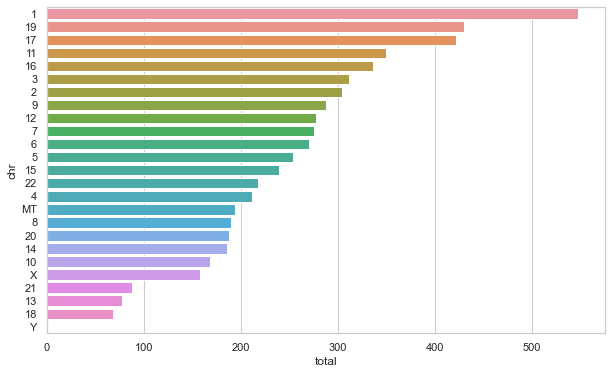

In [12]:
# The following line will make a grid on a white background
sns.set(style="whitegrid")

# Set the size of the figure plot
plt.figure(figsize=(10,6))

# Create a barplot with 
sns.barplot(x="total", y="chr", data= metagenic)

Notes: Add:
```python
# Define colorstyle
sns.set_color_codes("deep")

# Define figure size
f, ax = plt.subplots(figsize=(10,6))

# First plot the total counts
sns.barplot(x= "total", y="chr", data= metagenic, label = "total", color = 'b')
# Then plot the ones with ribo counts
sns.barplot(x="ribo",y="chr", data= metagenic, label = "ribo", color="y")
# Third bar with exons
sns.barplot(x="exon",y="chr", data= metagenic, label = "exon", color="r")
# Add a legend and informative axis label
ax.legend(loc = "lower right") # When doing this: add 'f, ax' before plt.figure --> f, ax = plt.fi...
```


## 3.2.4 Multiplot grids
Seaborn easily helps you to visualise pairwise relationships and marginal distributions. See notebooks for a short example. 

<center> <img src="img/multiplot.png" width=600px> </center>


### 3.2.5 Scatter plot - Use-case
- Volcano plots often used in differetial expression (RNA-seq) 
- Essentially, a volcano plot is the same as a scatter plot
- Example: 

<center> <img src="img/volcano-plot-example.png" width=500px height=400px> </center>

Notes: A useful plot in differential expression analysis (RNA-seq) is a volcano plot. A volcano plot visualises and identifies statistically significant gene expression changes from two different conditions.  Essentially, a volcano plot is a scatter plot and can also be approached from this perspective in Seaborn logic. The data for this experiment is retrieved from the GTN tutorial "RNA Seq Counts to Viz in R" ([link](https://galaxyproject.github.io/training-material/topics/transcriptomics/tutorials/rna-seq-counts-to-viz-in-r/tutorial.html)).

A volcano plot shows statistical significance (P-value) versus magnitude of change (fold change). The most upregulated genes are towards the right, the most downregulated genes are towards the left, and the most statistically significant genes are towards the top. With this plot, we can then quickly identify genes with large fold changes that are also statistically significant, i.e. probably the most biologically significant genes.

### 3.2.5 Scatter plot - Use-case

In [1]:
# Import dataset
volc = pd.read_csv('data/annotatedDEgenes.tabular', sep='\t')
volc.head()

NameError: name 'pd' is not defined

Notes: We already have the `log2(FC)` values. The P-value needs to be log10 transformed. Notice that the datatype of the values in the DataFrame are interpreted as `numpy.float64`. 

```python
# Check the data type of a value in the P-values column
type(volc['P-value'][0])
```

In the following code block we will add the log10 transformed P-values using Numpy's log10 function.
```python
# Log10 transform the p-values 
volc['Log10 P-value'] = -np.log10(volc['P-value'])
volc.head()
```

### 3.2.5 Scatter plot - Use-case

In [ ]:
# Volcano plot using Seaborn's scatterplot
ax = sns.scatterplot(x='log2(FC)', y='Log10 P-value', data=volc)

### 3.2.5.1 Exercise
Mimic the graph given below which is extracted from the [tutorial](https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-counts-to-viz-in-r/tutorial.html#volcano-plot) and represents the final result. 
- Use a darkgrid background
- Color the dots according to its strand orientations
- Add a title, x- and y-labels 
- Save the figure  

Extra: figure out how you can:
- Move the legend outside of the plot
- Remove the upper and right spine of the plots



The tutorial creates this plot: 
![Volcano plot](img/volcano-plot-gtn.png)

### 3.2.5 Heatmap - Use-case

Import the use-case data:

In [ ]:
# 1. Import data & Prepare the data (note the index)
heatmap_df = pd.read_csv('data/heatmap_data.csv', index_col=0)
heatmap_df.head()

Notes: This example is the sequel of exercise 2.5.4 in the previous chapter. In this exercise, derived from the GTN, we will plot the data that we cleaned in the previous chapter to create a heatmap of the top differentially expressed genes in an RNA-seq counts dataset.

### 3.2.5 Heatmap - Use-case

Preparing the data:

In [ ]:
# Importing statistical library from scipy for calculating z-scores
from scipy import stats 

# Data scaling by row (scale genes) with zscores
for row in range(len(heatmap_df)):
    heatmap_df.iloc[row] = stats.zscore(heatmap_df.iloc[row])
    
heatmap_df

### 3.2.5 Heatmap - Use-case

Plot the heatmap:

In [ ]:
sns.heatmap(heatmap_df, cmap="RdBu", annot=True)

Notes: Add:
```python
# 2. Set style of the plot
sns.set_style("ticks")
sns.color_palette("deep")

# 3. Define/create the plot
f = plt.figure(figsize=(10,10))
ax = sns.heatmap(heatmap_df, cmap="RdBu", annot=True)

# 4. Tweak lay-out
ax.set(xlabel='Samples', ylabel='Genes', title='Heatmap of DE genes')
```
 


## 3.3  An overview of lay-outing options

In [ ]:
# 1. Import data
...

# 2. Set style of the plot
sns.set(...)
sns.set_style(...)
sns.set_context(...)
sns.color_palette(...)
sns.axes_style(...)

# 3. Initialise the plot and plot the data. 
fig = plt.figure(...)  || fig, ax = plt.subplots() 
sns.lineplot(...)

# 4. Modify lay-out (title, labels, legend, etc.)
ax.set(...)
plt.xlabel(...)
plt.ylabel(...)

# Save the figure with:
#ax.savefig()

Notes: Finally, we will maken an overview of the different steps and lay-out options when plotting by using simple line-plots. 
    It's difficult to find best practices regarding plotting. However, the following steps can help you with a decent order to render your plots as expected.
    
 A lot of specifications and links to references in the course materials notebook!


<center> <img src="img/plotting-hierarchy.webp"> </center>

Notes: A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).


### 3.3.1 Exercise 
Import and inspect the dataset from [datahub.io](https://datahub.io/core/genome-sequencing-costs) containing the cost of genome sequencing throughout the years (also stored as `data/sequencing_costs.csv`).

![Seq cost per Mb](img/seqcost.png)

### 3.3.2 Extra exercise
Modify the code from the previous exercise to make two subplots underneath each other that plot the Cost per Mb over years and the Total cost. 
Find more information on subplots [here](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html) or [here](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8).

![Subplots sequencing cost](img/subplots_seqcost.png)

## 3.5 Further reading
The internet is full of blogs discussing visualisation libraries and best practices, here is a start for some further reading:
- https://realpython.com/python-matplotlib-guide/
- https://mode.com/blog/python-data-visualization-libraries
- https://pbpython.com/visualization-tools-1.html
- https://www.dataquest.io/blog/python-data-visualization-libraries/
- https://lisacharlotterost.de/2016/05/17/one-chart-code/